In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [2]:
lincar = envs.LinearCar()

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(lincar, estimator='central_fd', max_it=10000, eps=0.000001,  
                       parameter_domain=np.array([0,1]), rate = 1)
optimizer.estimator.var = 0.5

In [4]:
par, conv = optimizer.optimize(policy)

Start Central Finite Differences optimization:
Initial Parameters: [ 0.94114  0.60722  0.45418]
Run: 0  	Parameter: 	[ 0.94114  0.60722  0.45418]	Reward: -52.9157460471
		Gradient: 	[-1.31196  2.28503  0.38968]
Run: 100  	Parameter: 	[ 3.12663  2.69394  6.77838]	Reward: -19.7532633623
		Gradient: 	[-0.2718   0.24693  0.05019]
		Average Time: 	0.01s/step
Run: 200  	Parameter: 	[ 3.29346  3.49628  9.21239]	Reward: -23.5563607626
		Gradient: 	[ 0.32536 -0.28023  0.01005]
		Average Time: 	0.01s/step
Run: 300  	Parameter: 	[  3.82203   3.54379  10.91079]	Reward: -15.7635189346
		Gradient: 	[ 0.07225 -0.07719  0.0164 ]
		Average Time: 	0.01s/step
Run: 400  	Parameter: 	[  3.86541   3.81986  12.36702]	Reward: -17.9724948041
		Gradient: 	[ 0.27617 -0.27396  0.0091 ]
		Average Time: 	0.01s/step
Run: 500  	Parameter: 	[  4.21383   3.89737  13.57791]	Reward: -13.8991251701
		Gradient: 	[ 0.0324  -0.04073  0.01257]
		Average Time: 	0.01s/step
Run: 600  	Parameter: 	[  4.25792   4.08459  14.6723 ]	

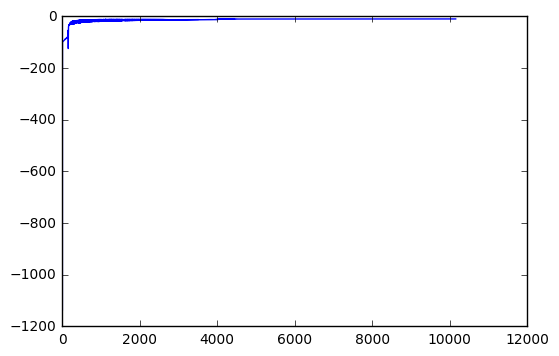

In [5]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[  8.52639   8.15188  40.56838]
Best Reward: 	-9.65131697556


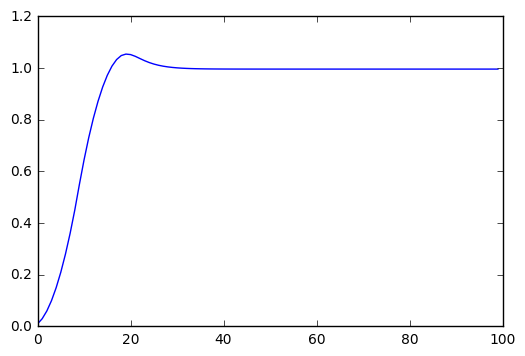

In [6]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace = lincar.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,len(trace))

plt.plot(x,y)
plt.show()

In [7]:
policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

#policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(lincar, estimator='forward_fd', max_it=1000, eps=0.0001,  
                       parameter_domain=np.array([-1,1]), rate = 0.2)
optimizer.estimator.var = 0.5

In [8]:
par, conv = optimizer.optimize(policy)

KeyboardInterrupt: 

In [ ]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter: [  5.54976  -6.31094 -10.8346 ]
Best Reward: -27.5753021636


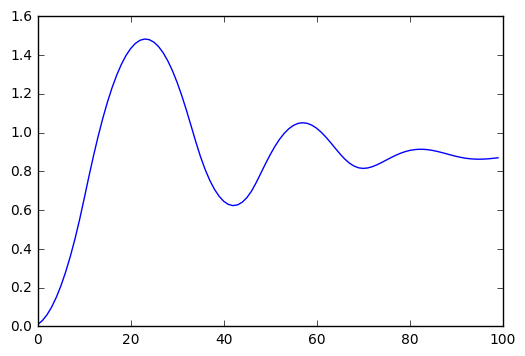

In [8]:
print("Best Parameter: "+str(optimizer.best_parameter))
print("Best Reward: "+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace = lincar.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()